In [3]:
%matplotlib inline
import numpy as np

## 2.5.1 介绍

(密集) 矩阵是:
- 数据对象
- 存储二维值数组的数据结构

重要特征:
- 一次分配所有项目的内存
    - 通常是一个连续组块，想一想Numpy数组
- *快速*访问个项目(*)

### 2.5.1.1 为什么有稀疏矩阵？

- 内存，增长是n**2
- 小例子（双精度矩阵）:

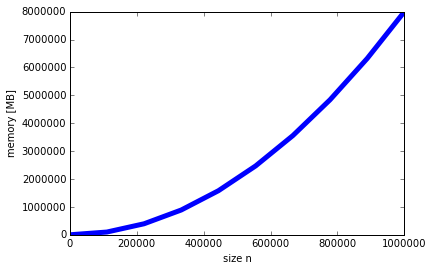

In [5]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1e6, 10)
plt.plot(x, 8.0 * (x**2) / 1e6, lw=5)   
plt.xlabel('size n')
plt.ylabel('memory [MB]')

### 2.5.1.2 稀疏矩阵 vs. 稀疏矩阵存储方案

- 稀疏矩阵是一个矩阵，巨大多数是空的
- 存储所有的0是浪费 -> 只存储非0项目
- 想一下**压缩**
- 有利: 巨大的内存节省
- 不利: 依赖实际的存储方案, (\*) 通常并不能满足

### 2.5.1.3 典型应用
- 偏微分方程（PDES）的解
    - 有限元素法
    - 机械工程、电子、物理...
- 图论
    - （i，j）不是0表示节点i与节点j是联接的
- ...

### 2.5.1.4 先决条件

最新版本的
- `numpy`
- `scipy`
- `matplotlib` (可选)
- `ipython` (那些增强很方便)

### 2.5.1.5 稀疏结构可视化

- matplotlib中的`spy()`
- 样例绘图:

![](http://scipy-lectures.github.io/_images/graph.png)
![](http://scipy-lectures.github.io/_images/graph_g.png)
![](http://scipy-lectures.github.io/_images/graph_rcm.png)

## 2.5.2 存储机制

- scipy.sparse中有七类稀疏矩阵:
    1. csc_matrix: 压缩列格式
    2. csr_matrix: 压缩行格式
    3. bsr_matrix: 块压缩行格式
    4. lil_matrix: 列表的列表格式
    5. dok_matrix: 值的字典格式
    6. coo_matrix: 座标格式 (即 IJV, 三维格式)
    7. dia_matrix: 对角线格式
- 每一个类型适用于一些任务
- 许多都利用了由Nathan Bell提供的稀疏工具 C ++ 模块
- 假设导入了下列模块:

In [1]:
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt

- 给Numpy用户的**warning**:
    - 使用'\*'的乘是*矩阵相乘* (点积)
    - 并不是Numpy的一部分!
        - 向Numpy函数传递一个稀疏矩阵希望一个ndarray/矩阵是没用的

### 2.5.2.1 通用方法

- 所有scipy.sparse类都是spmatrix的子类
    - 算术操作的默认实现
        - 通常转化为CSR
        - 为了效率而子类覆盖
    - 形状、数据类型设置/获取
    - 非0索引
    - 格式转化、与Numpy交互(toarray(), todense())
    - ...

- 属性:
    - mtx.A - 与mtx.toarray()相同
    - mtx.T - 转置 (与mtx.transpose()相同)
    - mtx.H - Hermitian (列举) 转置
    - mtx.real - 复矩阵的真部
    - mtx.imag - 复矩阵的虚部
    - mtx.size - 非零数 (与self.getnnz()相同)
    - mtx.shape - 行数和列数 (元组)

- 数据通常储存在Numpy数组中

### 2.5.2.2 稀疏矩阵类
#### 2.5.2.2.1 对角线格式 (DIA)
- 非常简单的格式
- 形状 (n_diag, length) 的密集Numpy数组的对角线
    - 固定长度 -> 当离主对角线比较远时会浪费空间
    - \_data_matrix的子类 (带数据属性的稀疏矩阵类)
- 每个对角线的偏移
    - 0 是主对角线
    - 负偏移 = 下面
    - 正偏移 = 上面
- 快速矩阵 * 向量 (sparsetools)
- 快速方便的关于项目的操作
    - 直接操作数据数组 (快速的NumPy机件)
- 构建器接受 :
    - 密集矩阵 (数组)
    - 稀疏矩阵
    - 形状元组 (创建空矩阵)
    - (数据, 偏移) 元组
- 没有切片、没有单个项目访问
- 用法 :
    - 非常专业
    - 通过有限微分解偏微分方程
    - 有一个迭代求解器
##### 2.5.2.2.1.1 示例
- 创建一些DIA矩阵 :

In [3]:
data = np.array([[1, 2, 3, 4]]).repeat(3, axis=0)
data

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [6]:
offsets = np.array([0, -1, 2])
mtx = sparse.dia_matrix((data, offsets), shape=(4, 4))
mtx 

<4x4 sparse matrix of type '<type 'numpy.int64'>'
	with 9 stored elements (3 diagonals) in DIAgonal format>

In [7]:
mtx.todense()

matrix([[1, 0, 3, 0],
        [1, 2, 0, 4],
        [0, 2, 3, 0],
        [0, 0, 3, 4]])

In [9]:
data = np.arange(12).reshape((3, 4)) + 1
data

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [10]:
mtx = sparse.dia_matrix((data, offsets), shape=(4, 4))
mtx.data

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [11]:
mtx.offsets

array([ 0, -1,  2], dtype=int32)

In [12]:
print mtx

  (0, 0)	1
  (1, 1)	2
  (2, 2)	3
  (3, 3)	4
  (1, 0)	5
  (2, 1)	6
  (3, 2)	7
  (0, 2)	11
  (1, 3)	12


In [13]:
mtx.todense()

matrix([[ 1,  0, 11,  0],
        [ 5,  2,  0, 12],
        [ 0,  6,  3,  0],
        [ 0,  0,  7,  4]])

- 机制的解释 :

偏移: 行

     2:  9
     1:  --10------
     0:  1  . 11  .
    -1:  5  2  . 12
    -2:  .  6  3  .
    -3:  .  .  7  4
         ---------8
         
- 矩阵-向量相乘

In [15]:
vec = np.ones((4, ))
vec

array([ 1.,  1.,  1.,  1.])

In [16]:
mtx * vec

array([ 12.,  19.,   9.,  11.])

In [17]:
mtx.toarray() * vec

array([[  1.,   0.,  11.,   0.],
       [  5.,   2.,   0.,  12.],
       [  0.,   6.,   3.,   0.],
       [  0.,   0.,   7.,   4.]])

#### 2.5.2.2.2 列表的列表格式 (LIL)
- 基于行的联接列表
    - 每一行是一个Python列表（排序的）非零元素的列索引
    - 行存储在Numpy数组中 (dtype=np.object)
    - 非零值也近似存储
- 高效增量构建稀疏矩阵
- 构建器接受 :
    - 密集矩阵 (数组)
    - 稀疏矩阵
    - 形状元组 (创建一个空矩阵)
- 灵活切片、高效改变稀疏结构
- 由于是基于行的，算术和行切片慢
- 用途 :
    - 当稀疏模式并不是已知的逻辑或改变
    - 例子：从一个文本文件读取稀疏矩阵
##### 2.5.2.2.2.1 示例
- 创建一个空的LIL矩阵 :

In [2]:
mtx = sparse.lil_matrix((4, 5))

- 准备随机数据:

In [4]:
from numpy.random import rand
data = np.round(rand(2, 3))
data

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.]])

- 使用象征所以分配数据:

In [6]:
mtx[:2, [1, 2, 3]] = data
mtx  

<4x5 sparse matrix of type '<type 'numpy.float64'>'
	with 3 stored elements in LInked List format>

In [7]:
print mtx   

  (0, 1)	1.0
  (0, 3)	1.0
  (1, 2)	1.0


In [8]:
mtx.todense()

matrix([[ 0.,  1.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])

In [9]:
mtx.toarray()

array([[ 0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

更多的切片和索引:

In [10]:
mtx = sparse.lil_matrix([[0, 1, 2, 0], [3, 0, 1, 0], [1, 0, 0, 1]])
mtx.todense()

matrix([[0, 1, 2, 0],
        [3, 0, 1, 0],
        [1, 0, 0, 1]])

In [11]:
print mtx

  (0, 1)	1
  (0, 2)	2
  (1, 0)	3
  (1, 2)	1
  (2, 0)	1
  (2, 3)	1


In [12]:
mtx[:2, :] 

<2x4 sparse matrix of type '<type 'numpy.int64'>'
	with 4 stored elements in LInked List format>

In [13]:
mtx[:2, :].todense()

matrix([[0, 1, 2, 0],
        [3, 0, 1, 0]])

In [14]:
mtx[1:2, [0,2]].todense()

matrix([[3, 1]])

In [15]:
mtx.todense()

matrix([[0, 1, 2, 0],
        [3, 0, 1, 0],
        [1, 0, 0, 1]])

#### 2.5.2.2.3 值的字典格式 (DOK)

- Python字典的子类
    - 键是 (行, 列) 索引元组 (不允许重复的条目)
    - 值是对应的非零值
- 高效增量构建稀疏矩阵
- 构建器支持:
    - 密集矩阵 (数组)
    - 稀疏矩阵
    - 形状元组 (创建空矩阵)
- 高效 O(1) 对单个元素的访问
- 灵活索引，改变稀疏结构是高效
- 一旦创建完成后可以被高效转换为coo_matrix
- 算术很慢 (循环用`dict.iteritems()`)
- 用法:
    - 当稀疏模式是未知的假设或改变时
    
##### 2.5.2.2.3.1 示例

- 逐个元素创建一个DOK矩阵:

In [16]:
mtx = sparse.dok_matrix((5, 5), dtype=np.float64)
mtx

<5x5 sparse matrix of type '<type 'numpy.float64'>'
	with 0 stored elements in Dictionary Of Keys format>

In [17]:
for ir in range(5):
    for ic in range(5):
        mtx[ir, ic] = 1.0 * (ir != ic)
mtx

<5x5 sparse matrix of type '<type 'numpy.float64'>'
	with 20 stored elements in Dictionary Of Keys format>

In [18]:
mtx.todense()

matrix([[ 0.,  1.,  1.,  1.,  1.],
        [ 1.,  0.,  1.,  1.,  1.],
        [ 1.,  1.,  0.,  1.,  1.],
        [ 1.,  1.,  1.,  0.,  1.],
        [ 1.,  1.,  1.,  1.,  0.]])

- 切片与索引:

In [19]:
mtx[1, 1]

0.0

In [20]:
mtx[1, 1:3]     

<1x2 sparse matrix of type '<type 'numpy.float64'>'
	with 1 stored elements in Dictionary Of Keys format>

In [21]:
mtx[1, 1:3].todense()

matrix([[ 0.,  1.]])

In [22]:
mtx[[2,1], 1:3].todense() 

matrix([[ 1.,  0.],
        [ 0.,  1.]])

#### 2.5.2.2.4 座标格式 (COO)

- 也被称为 ‘ijv’ 或 ‘triplet’ 格式
    - 三个NumPy数组: row, col, data
    - `data[i]`是在 (row[i], col[i]) 位置的值
    - 允许重复值
- `\_data\_matrix`的子类 (带有`data`属性的稀疏矩阵类)
- 构建稀疏矩阵的高速模式
- 构建器接受:
    - 密集矩阵 (数组)
    - 稀疏矩阵
    - 形状元组 (创建空数组)
    - `(data, ij)`元组
- 与CSR/CSC格式非常快的互相转换
- 快速的矩阵 * 向量 (sparsetools)
- 快速而简便的逐项操作
    - 直接操作数据数组 (快速NumPy机制)
- 没有切片，没有算术 (直接)
- 使用:
    - 在各种稀疏格式间的灵活转换
    - 当转化到其他形式 (通常是 CSR 或 CSC), 重复的条目被加总到一起
        - 有限元素矩阵的快速高效创建
        
##### 2.5.2.2.4.1 示例

- 创建空的COO矩阵:

In [23]:
mtx = sparse.coo_matrix((3, 4), dtype=np.int8)
mtx.todense()

matrix([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=int8)

- 用 (data, ij) 元组创建:

In [24]:
row = np.array([0, 3, 1, 0])
col = np.array([0, 3, 1, 2])
data = np.array([4, 5, 7, 9])
mtx = sparse.coo_matrix((data, (row, col)), shape=(4, 4))
mtx     

<4x4 sparse matrix of type '<type 'numpy.int64'>'
	with 4 stored elements in COOrdinate format>

In [25]:
mtx.todense()

matrix([[4, 0, 9, 0],
        [0, 7, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 5]])

#### 2.5.2.2.5 压缩稀疏行格式 (CSR)
- 面向行
    - 三个Numpy数组: `indices`, `indptr`, `data`
        - `indices`是列索引的数组
        - `data`是对应的非零值数组
        - `indptr`指向行开始的所以和数据
        - 长度是`n_row + 1`, 最后一个项目 = 值数量 = `indices`和`data`的长度
        - i-th行的非零值是列索引为`indices[indptr[i]:indptr[i+1]]`的`data[indptr[i]:indptr[i+1]]`
        - 项目 (i, j) 可以通过`data[indptr[i]+k]`, k是j在`indices[indptr[i]:indptr[i+1]]`的位置来访问
    - `_cs_matrix` (常规 CSR/CSC 功能) 的子类
    - `_data_matrix` (带有`data`属性的稀疏矩阵类) 的子类
- 快速矩阵向量相乘和其他算术 (sparsetools)
- 构建器接受:
    - 密集矩阵 (数组)
    - 稀疏矩阵
    - 形状元组 (创建空矩阵)
    - `(data, ij)` 元组
    - `(data, indices, indptr)` 元组
- 高效行切片，面向行的操作
- 较慢的列切片，改变稀疏结构代价昂贵
- 用途:
    - 实际计算 (大多数线性求解器都支持这个格式)

##### 2.5.2.2.5.1 示例

- 创建空的CSR矩阵:

In [26]:
mtx = sparse.csr_matrix((3, 4), dtype=np.int8)
mtx.todense()

matrix([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=int8)

- 用`(data, ij)`元组创建:

In [27]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
mtx = sparse.csr_matrix((data, (row, col)), shape=(3, 3))
mtx     

<3x3 sparse matrix of type '<type 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [28]:
mtx.todense()

matrix([[1, 0, 2],
        [0, 0, 3],
        [4, 5, 6]])

In [29]:
mtx.data

array([1, 2, 3, 4, 5, 6])

In [30]:
mtx.indices

array([0, 2, 2, 0, 1, 2], dtype=int32)

In [31]:
mtx.indptr

array([0, 2, 3, 6], dtype=int32)

用`(data, indices, indptr)`元组创建:

In [32]:
data = np.array([1, 2, 3, 4, 5, 6])
indices = np.array([0, 2, 2, 0, 1, 2])
indptr = np.array([0, 2, 3, 6])
mtx = sparse.csr_matrix((data, indices, indptr), shape=(3, 3))
mtx.todense()

matrix([[1, 0, 2],
        [0, 0, 3],
        [4, 5, 6]])

#### 2.5.2.2.6 压缩稀疏列格式 (CSC)

- 面向列
    - 三个Numpy数组: `indices`、`indptr`、`data`
    - `indices`是行索引的数组
    - `data`是对应的非零值
    - `indptr`指向`indices`和`data`开始的列
    - 长度是`n_col + 1`, 最后一个条目 = 值数量 = `indices`和`data`的长度
    - 第i列的非零值是行索引为`indices[indptr[i]:indptr[i+1]]`的`data[indptr[i]:indptr[i+1]]`
    - 项目 (i, j) 可以作为`data[indptr[j]+k]`访问, k是i在`indices[indptr[j]:indptr[j+1]]`的位置
    - `_cs_matrix`的子类 (通用的 CSR/CSC 功能性)
        - `_data_matrix`的子类 (带有`data`属性的稀疏矩阵类)
- 快速的矩阵和向量相乘及其他数学 (sparsetools)
- 构建器接受：
    - 密集矩阵 (数组)
    - 稀疏矩阵
    - 形状元组 (创建空矩阵)
    - `(data, ij)`元组
    - `(data, indices, indptr)`元组
- 高效列切片、面向列的操作
- 较慢的行切片、改变稀疏结构代价昂贵
- 用途:
    - 实际计算 (巨大多数线性求解器支持这个格式)
    
##### 2.5.2.2.6.1 示例

- 创建空CSC矩阵:

In [33]:
mtx = sparse.csc_matrix((3, 4), dtype=np.int8)
mtx.todense()

matrix([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=int8)

- 用`(data, ij)`元组创建:

In [34]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
mtx = sparse.csc_matrix((data, (row, col)), shape=(3, 3))
mtx     

<3x3 sparse matrix of type '<type 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Column format>

In [35]:
mtx.todense()

matrix([[1, 0, 2],
        [0, 0, 3],
        [4, 5, 6]])

In [36]:
mtx.data

array([1, 4, 5, 2, 3, 6])

In [37]:
mtx.indices

array([0, 2, 2, 0, 1, 2], dtype=int32)

In [38]:
mtx.indptr

array([0, 2, 3, 6], dtype=int32)

- 用`(data, indices, indptr)`元组创建:

In [39]:
data = np.array([1, 4, 5, 2, 3, 6])
indices = np.array([0, 2, 2, 0, 1, 2])
indptr = np.array([0, 2, 3, 6])
mtx = sparse.csc_matrix((data, indices, indptr), shape=(3, 3))
mtx.todense()

matrix([[1, 0, 2],
        [0, 0, 3],
        [4, 5, 6]])

#### 2.5.2.2.7 块压缩行格式 (BSR)
- 本质上，CSR带有密集的固定形状的子矩阵而不是纯量的项目
    - 块大小`(R, C)`必须可以整除矩阵的形状`(M, N)`
    - 三个Numpy数组: `indices`、`indptr`、`data`
        - `indices`是每个块列索引的数组
        - `data`是形状为(nnz, R, C)对应的非零值
        - ...
    - `_cs_matrix`的子类 (通用的CSR/CSC功能性)
    - `_data_matrix`的子类 (带有`data`属性的稀疏矩阵类)
- 快速矩阵向量相乘和其他的算术 (sparsetools)
- 构建器接受:
    - 密集矩阵 (数组)
    - 稀疏矩阵
    - 形状元组 (创建空的矩阵)
    - `(data, ij)`元组
    - `(data, indices, indptr)`元组 
- 许多对于带有密集子矩阵的稀疏矩阵算术操作比CSR更高效很多
- 用途:
    - 类似CSR
    - 有限元素向量值离散化
##### 2.5.2.2.7.1 示例

- 创建空的`(1, 1)`块大小的（类似CSR...）的BSR矩阵:

In [40]:
mtx = sparse.bsr_matrix((3, 4), dtype=np.int8)
mtx 

<3x4 sparse matrix of type '<type 'numpy.int8'>'
	with 0 stored elements (blocksize = 1x1) in Block Sparse Row format>

In [41]:
mtx.todense()

matrix([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=int8)

- 创建块大小`(3, 2)`的空BSR矩阵:

In [42]:
mtx = sparse.bsr_matrix((3, 4), blocksize=(3, 2), dtype=np.int8)
mtx

<3x4 sparse matrix of type '<type 'numpy.int8'>'
	with 0 stored elements (blocksize = 3x2) in Block Sparse Row format>

    - 一个bug?
- 用`(1, 1)`块大小 (类似 CSR...)`(data, ij)`的元组创建:

In [43]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
mtx = sparse.bsr_matrix((data, (row, col)), shape=(3, 3))
mtx 

<3x3 sparse matrix of type '<type 'numpy.int64'>'
	with 6 stored elements (blocksize = 1x1) in Block Sparse Row format>

In [44]:
mtx.todense()

matrix([[1, 0, 2],
        [0, 0, 3],
        [4, 5, 6]])

In [45]:
mtx.indices

array([0, 2, 2, 0, 1, 2], dtype=int32)

In [46]:
mtx.indptr

array([0, 2, 3, 6], dtype=int32)

- 用`(2, 1)`块大小`(data, indices, indptr)`的元组创建:

In [47]:
indptr = np.array([0, 2, 3, 6])
indices = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6]).repeat(4).reshape(6, 2, 2)
mtx = sparse.bsr_matrix((data, indices, indptr), shape=(6, 6))
mtx.todense()

matrix([[1, 1, 0, 0, 2, 2],
        [1, 1, 0, 0, 2, 2],
        [0, 0, 0, 0, 3, 3],
        [0, 0, 0, 0, 3, 3],
        [4, 4, 5, 5, 6, 6],
        [4, 4, 5, 5, 6, 6]])

In [48]:
data

array([[[1, 1],
        [1, 1]],

       [[2, 2],
        [2, 2]],

       [[3, 3],
        [3, 3]],

       [[4, 4],
        [4, 4]],

       [[5, 5],
        [5, 5]],

       [[6, 6],
        [6, 6]]])

### 2.5.2.3 总结

存储机制的总结


|格式|矩阵 * 向量|提取项目|灵活提取|设置项目|灵活设置|求解器|备注|
|------|---------------|--------|---------|--------|---------|-------|----|
|DIA|sparsetools|.|.|.|.|迭代|有数据数组，专门化|
|LIL|通过 CSR|是|是|是|是|迭代|通过CSR的算术, 增量构建|
|DOK|python|是|只有一个轴|是|是|迭代|`O(1)`条目访问, 增量构建|
|COO|sparsetools|.|.|.|.|迭代|有数据数组, 便利的快速转换|
|CSR|sparsetools|是|是|慢|.|任何|有数据数组, 快速以行为主的操作|
|CSC|sparsetools|是|是|慢|.|任何|有数据数组, 快速以列为主的操作|
|BSR|sparsetools|.|.|.|.|专门化|有数据数组，专门化|